#### Background

AAA Northeast is one of the regional clubs comprising the American Automobile Association.  AAA Northeast covers Rhode Island, Connecticut, Massachusetts and portions of New York and New Jersey.  The American Automobile Association has 58 million members in the US and Canada.  They offer services such as roadside assistance, maps and various discounts as part of their services.  Roadside assistance is a costly benefit, particularly towing.  Members who frequently use roadside assistance are less desirable.

AAA also offers other paid services at highly competitive prices.  They also offer insurance, travel and banking/loan products.  AAA would like to increase the penetration of these services.

A member may have a standard membership or a premium membership covering themselves and optionally additional household members.  Many of AAA members typically have a long tenure with the club.

#### Objectives

Provide a market segmentation of AAA members (or member households) that allows AAA Northeast to better serve their members.  They would use this analysis to:

    Better anticipate the needs of members
    Customize communications and offering to various segments
    Expend more effort driving acquisition and renewal of desirable members

We'll work with the members at the household level.

#### Methodology

There are several dimensions of revenue as well as cost.

#### Revenue:

    Products Purchased
    Tenure
    Number of members in the household
    Level of membership

#### Cost:

    Use of roadside service
    Frequency of use
    Cost to service

Summarize data to the household level.

Divide your data into training and validation sets.

Develop a series of “look-alike” models to determine the probability of purchasing each product.  Validate your models.

Develop models to predict the likelihood of using roadside service as well as the total cost of roadside usage.

Join your training and validation sets. Score all the members that do not have the purchase of a product with the probability of purchase.  If they have purchased the product, score them a 1.  Score them on the likelihood of roadside usage and the expected cost (in the next 12 months).

Use your model results to cluster/segment the members.  Use a small number of clusters (4-6).

You may include tenure (length of membership), number of members in the household and the sum of your product probabilities in your clustering as well as each model score.  Be creative.  Any numeric variable can potentially be used.

If you have performance issues you may subsample the data.

#### Deliverables

A slide deck describing your findings and the methodology that you used. 

You should describe your segments (clusters) in non-technical terms.  You should attempt to make recommendations as to how they might provide value to AAA Northeast.

### Ideas on how to tackle
- try to calcualte Age from birthdate
- count number of individuals in household
- count num of children (makes people more prone to buy safety products)
- drop columns which will not be useful and report with a markdown list
- check out which services have been purachased more and correlate to revenue / membership level

In [95]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [2]:
data = pd.read_csv('member_sample.csv', index_col = 0)

In [3]:
data.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


In [53]:
data.columns

Index(['Individual Key', 'Household Key', 'Member Flag', 'City',
       'State - Grouped', 'ZIP5', 'ZIP9', 'FSV CMSI Flag',
       'FSV Credit Card Flag', 'FSV Deposit Program Flag',
       ...
       'SC Vehicle Model Name', 'SVC Facility Name', 'SVC Facility Type',
       'Total Cost', 'Tow Destination Latitude', 'Tow Destination Longitude',
       'Tow Destination Name', 'Was Duplicated', 'Was Towed To AAR Referral',
       'age'],
      dtype='object', length=113)

### Check Null columns

In [73]:
data.isnull().sum().nsmallest(50)

Individual Key                   0
Household Key                    0
Member Flag                      0
City                             0
State - Grouped                  0
ZIP5                             0
ZIP9                             0
FSV CMSI Flag                    0
FSV Credit Card Flag             0
FSV Deposit Program Flag         0
FSV Home Equity Flag             0
FSV ID Theft Flag                0
FSV Mortgage Flag                0
INS Client Flag                  0
TRV Globalware Flag              0
Home Owner                       0
Income                           0
Reason Joined                    0
age                              0
Active Expiration Date           1
Bad Address Flag                 1
Billing Code Description         1
Branch Name                      1
County                           1
Do Not Direct Mail Solicit       1
Email Available                  1
Right_Individual Key             1
Join AAA Date                    1
Join Club Date      

In [75]:
data.isnull().sum().nlargest(50)

Dispatch Code2Description         21344
Prob2 Code Description            21336
Reinstate Date                    20849
Move Distance                     20703
Occupant Type                     20612
Right_Dwelling Type               20520
Responded to Catalog              20484
Tow Destination Name              17652
Right_Gender                      15961
Cancel Date                       13167
Cancel Reason                     13167
Months from Join to Cancel        13167
Occupation Code                   12562
Occupation Group                  12562
Gender                            12561
Date Of Birth                     11153
Email Status                      10423
Address Change Date                9955
Tow Destination Latitude           9531
Tow Destination Longitude          9531
Number of Children                 9334
Race                               9334
Length Of Residence                9334
Mail Responder                     9334
Children                           9334


In [63]:
find = [item for item in data.columns if "Memb" in item]
find

['Member Flag',
 'ERS Member Cost Year 1',
 'ERS Member Cost Year 2',
 'ERS Member Cost Year 3',
 'Member Key',
 'Member Map Location',
 'Member Number Associate ID',
 'Member Phone Type',
 'Member Status',
 'Member Tenure Years',
 'Member Type',
 'Membership ID',
 'Member Match Flag',
 'Member Number and Associate ID']

In [78]:
data['Home Owner'].value_counts().nlargest(20)

Home Owner             11121
unknown                 9715
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [81]:
data['Dwelling Type'].value_counts().nlargest(20)

SFDU                                        13322
Small or large multi-family w/apt number     2116
P.O. BOX                                      386
Large multi-family w/o apt number              67
Name: Dwelling Type, dtype: int64

In [96]:
data['City'].value_counts().nlargest(20)

WARWICK             2815
CRANSTON            2742
PROVIDENCE          1690
NORTH PROVIDENCE     948
COVENTRY             778
JOHNSTON             703
EAST GREENWICH       641
PAWTUCKET            640
NORTH KINGSTOWN      637
WEST WARWICK         606
CUMBERLAND           560
NARRAGANSETT         531
WAKEFIELD            497
RIVERSIDE            436
LINCOLN              402
EAST PROVIDENCE      372
PORTSMOUTH           328
MANVILLE             322
NEWPORT              321
BARRINGTON           313
Name: City, dtype: int64

In [97]:
data['Motorcycle Indicator'].value_counts()

N    9382
Y    3799
Name: Motorcycle Indicator, dtype: int64

In [56]:
data['SC Vehicle Model Name'].value_counts().nlargest(20)

CAMRY             825
COROLLA           597
ACCORD            547
CIVIC             411
ALTIMA            342
CR-V              297
TAURUS            276
FOCUS             226
ELANTRA           192
GRAND CHEROKEE    187
RAV4              180
SONATA            177
F-150             174
FORESTER          149
JETTA             145
OUTBACK           144
MALIBU            132
FUSION            129
GRAND MARQUIS     125
RANGER            112
Name: SC Vehicle Model Name, dtype: int64

In [58]:
data['SC Vehicle Manufacturer Name'].value_counts().nlargest(20)

TOYOTA           2289
FORD             1580
HONDA            1494
CHEVROLET         935
NISSAN            780
HYUNDAI           630
BUICK             491
SUBARU            480
JEEP              468
DODGE             391
CHRYSLER          387
VOLKSWAGEN        357
VOLVO             340
LEXUS             325
MERCURY           278
MERCEDES-BENZ     276
MAZDA             264
KIA               246
CADILLAC          195
SATURN            182
Name: SC Vehicle Manufacturer Name, dtype: int64

In [59]:
data['Education'].value_counts().nlargest(20)

Unknown              4264
Some College         3058
High School          2901
Completed College    1602
Graduated School      185
Name: Education, dtype: int64

In [60]:
data['Gender'].value_counts().nlargest(20)

Female     4595
Male       4179
Unknown       9
Name: Gender, dtype: int64

### Write function to calculate age

In [6]:
def calcualte_age(date_string):
    try:
        iso = datetime.fromisoformat(date_string)
        age = (datetime.now() - iso) // timedelta(days=365.2425)
    except:
        age = 0
    return age

In [7]:
data['age'] = [calcualte_age(item) for item in data['Date Of Birth']]

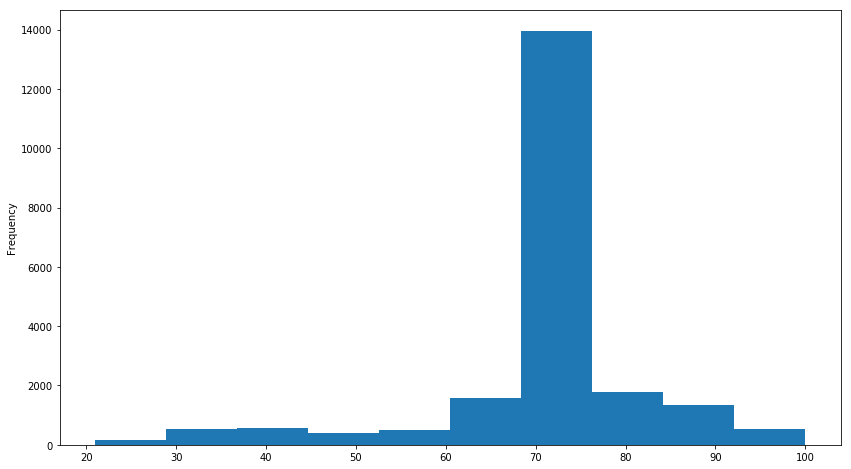

In [98]:
data.age.plot(kind = 'hist')

In [9]:
data.age.replace(0,data.age[data.age != 0].mean(axis=0),inplace=True)

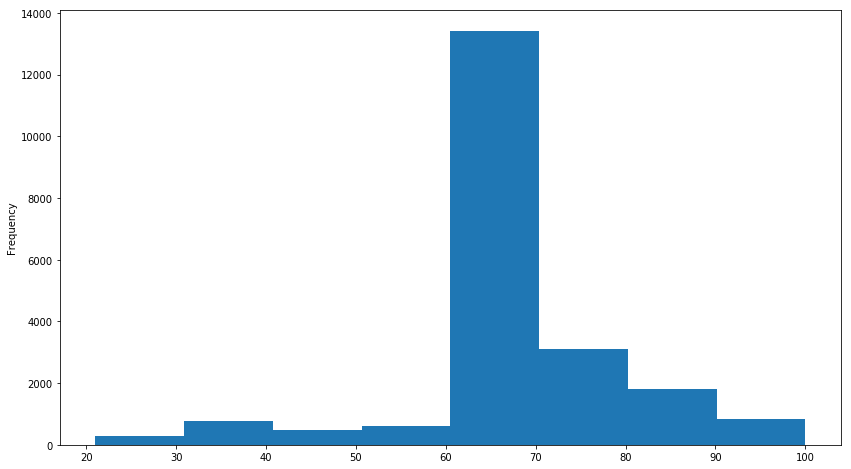

In [99]:
data.age.plot(kind = 'hist', bins = 8)

<function matplotlib.pyplot.show(*args, **kw)>

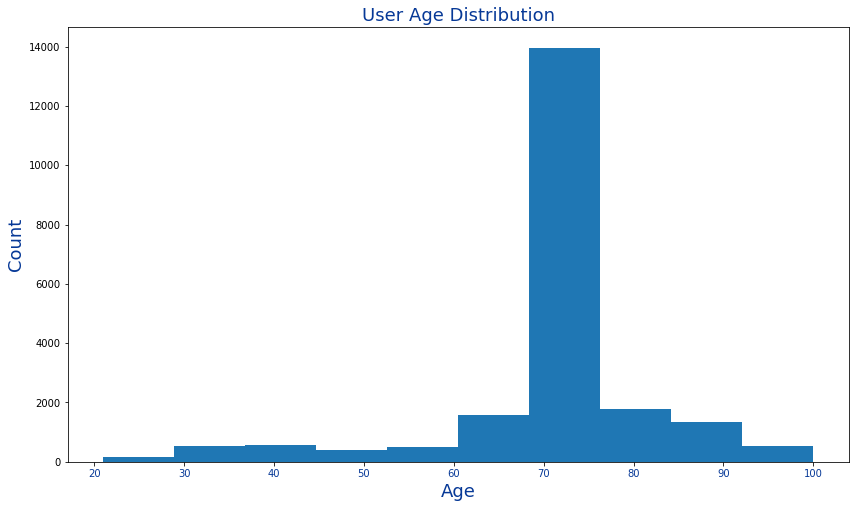

In [100]:
X = data.age
DF_75th = round(X.describe()['75%'], 2)
DF_AVG = round(X.describe()['mean'], 2)

plt.hist(X)
plt.ylabel('Count', fontsize = 18, color = '#073997')
plt.xlabel('Age', fontsize = 18, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('User Age Distribution', fontsize = 18, color = '#073997')
plt.savefig('User_age_histogram', bbox_inches = 'tight')
plt.show

### Deal with null values

In [12]:
nulls = data.isnull().sum()

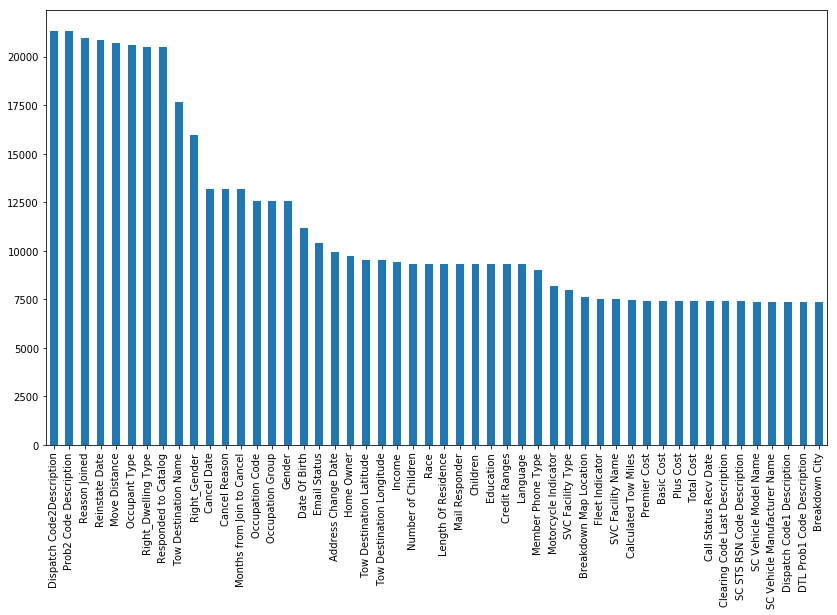

In [101]:
nulls.nlargest(50).plot(kind = 'bar')

In [82]:
data.Income.value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [83]:
data.Income.fillna('unknown', inplace = True)

In [84]:
data.Income.value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [85]:
data['Home Owner'].value_counts()

Home Owner             11121
unknown                 9715
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [86]:
data['Home Owner'].fillna('unknown', inplace = True)

In [87]:
data['Home Owner'].value_counts()

Home Owner             11121
unknown                 9715
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [88]:
data.groupby('Home Owner')['FSV CMSI Flag'].size()

Home Owner
Home Owner             11121
Probable Home Owner        7
Probable Renter           10
Renter                   491
unknown                 9715
Name: FSV CMSI Flag, dtype: int64

### Turn Y and N into boolean 1 or 0 

In [89]:
def yes_noer(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan

In [90]:
data['FSV CMSI Flag'] = data['FSV CMSI Flag'].apply(yes_noer)

In [91]:
data.groupby('Home Owner')['FSV CMSI Flag'].mean()

Home Owner
Home Owner            NaN
Probable Home Owner   NaN
Probable Renter       NaN
Renter                NaN
unknown               NaN
Name: FSV CMSI Flag, dtype: float64

In [92]:
home_owners = data[data['Home Owner'] == 'Home Owner']

In [93]:
home_owners['FSV CMSI Flag'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: FSV CMSI Flag, dtype: float64

In [103]:
bought_mortgage = home_owners[home_owners['FSV CMSI Flag'] == 1]

In [104]:
bought_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 113 entries, Individual Key to age
dtypes: float64(38), object(75)
memory usage: 0.0+ bytes


In [105]:
data['Premier Cost'].value_counts()

0.0     13908
9.0         1
81.0        1
6.0         1
Name: Premier Cost, dtype: int64

### Homeowners with high Income engage in the Morgage Service

In [106]:
sns.countplot(bought_mortgage['Income'])
plt.xticks(rotation = 90)

ValueError: min() arg is an empty sequence

### Aggregate data by household Key

In [ ]:
data_categorical = pd.get_dummies(data[['Household Key', 'FSV CMSI Flag', 'SC Vehicle Manufacturer Name']])

In [ ]:
cols = data_categorical.columns

In [ ]:
cnt_list = ['sum' for c in cols]

In [ ]:
col_dict = {f:v for f, v in zip(cols, cnt_list)}

In [ ]:
col_dict['FSV CMSI Flag'] = 'max'
col_dict['Household Key'] = 'max'

In [ ]:
data_categorical.groupby('Household Key').agg(col_dict)

In [ ]:
data.head()

### Look at AVG Cost per state
- most of the Data is from RI
- RI has a higher AVG Cost per incident

In [ ]:
data['State - Grouped'].value_counts()

In [ ]:
data.groupby('State - Grouped')['Total Cost'].mean()

### Look at # of Children

In [ ]:
data['Number of Children'].value_counts()

In [ ]:
vals = data['Number of Children'].value_counts().index
nums = list(range(7))

In [ ]:
col_dic = {v:n for v, n in zip(vals, nums)}

In [ ]:
col_dic

In [ ]:
data['Number of Children'] = data['Number of Children'].map(col_dic)

In [ ]:
data['Number of Children'].value_counts()